### Farid Abdalla & Noah Graells

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import ExcelWriter
from pandas import ExcelFile

%matplotlib inline

### A)

In [2]:
data_train = np.genfromtxt('student-dataset-train.csv', delimiter=',')
data_test = np.genfromtxt('student-dataset-test.csv', delimiter=',')

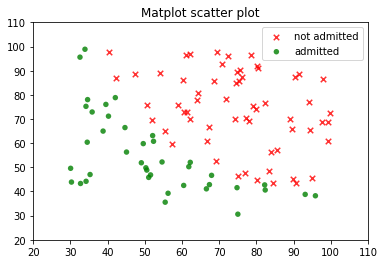

In [3]:
colors = ("red", "green")
markers = ('x', 'o')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([20, 110])
ax.set_ylim([20, 110])

not_admitted = np.array([data[:2] for data in data_train if data[2] == 0.0])
admitted = np.array([data[:2] for data in data_train if data[2] == 1.0])

not_admitted_graph = ax.scatter(admitted[:, 0], admitted[:, 1], alpha=0.8, c=colors[0], marker=markers[0], edgecolors='none', s=30)
admitted_graph = ax.scatter(not_admitted[:, 0], not_admitted[:, 1], alpha=0.8, c=colors[1], marker=markers[1], edgecolors='none', s=30)

plt.title('Matplot scatter plot')
plt.legend([not_admitted_graph, admitted_graph], ["not admitted", "admitted"], loc=1)
plt.show()

In [4]:
X_train = data_train[:, :2]
X_test = data_test[:, :2]


mean_x1 = np.mean(X_train[0])
mean_x2 = np.mean(X_train[1])

var_x1 = np.std(X_train[0])
var_x2 = np.std(X_train[1])

X_train[:,0] = (X_train[:,0] - mean_x1) / var_x1
X_train[:,1] = (X_train[:,1] - mean_x2) / var_x2

y_train = data_train[:, -1]
y_test = data_test[:, -1]

x1_square_train = np.square(X_train[:, 0])
x2_square_train = np.square(X_train[:, 1])
x1_x2_train = X_train[:, 0] * X_train[:, 1]

X_train = np.c_[np.ones(np.shape(X_train)[0]), X_train, x1_square_train, x2_square_train, x1_x2_train]

In [5]:
print(f"Shape X train : {np.shape(X_train)}")
print(f"Shape X test : {np.shape(X_test)}")
print(f"Shape y train : {np.shape(y_train)}")
print(f"Shape y test : {np.shape(y_test)}")

Shape X train : (100, 6)
Shape X test : (100, 2)
Shape y train : (100,)
Shape y test : (100,)


### C)

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

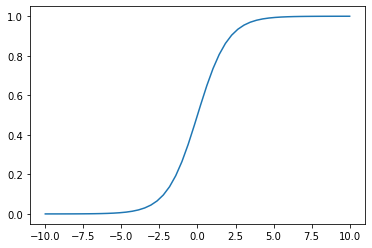

In [7]:
new_x = np.linspace(-10, 10)
plt.plot(new_x, sigmoid(new_x))

### D)

In [8]:
def hTheta(theta, x):
    return sigmoid(np.dot(x, theta))

### E)

In [9]:
def jTheta(theta, X, y):
    epsilon = 1e-6
    h = hTheta(theta, X)
    N = len(X)
    return np.sum(y * np.log(h + epsilon) + (1-y) * np.log(1 - h + epsilon)) / N

### F)

In [10]:
def gradientAscent(X, y, learning_rate, num_epoch):
    N = X.shape[0]
    D = X.shape[1]
    theta = np.zeros(D)
    Js = np.zeros(num_epoch)
    for i in range(num_epoch):
        h = hTheta(theta, X)
        theta = theta + learning_rate * (y - hTheta(theta, X)).dot(X) / N
        Js[i] = jTheta(theta, X, y)
    
    return theta, Js

### G)

In [11]:
theta, J = gradientAscent(X_train, y_train, 0.001, 1000000)
print(theta)

[-6.51625376e+00 -5.35513310e-01 -1.50778637e+00  2.29644262e-03
  1.03234319e+00  7.32127635e+00]


### H)

In [12]:
X_test[:,0] = (X_test[:,0] - mean_x1) / var_x1
X_test[:,1] = (X_test[:,1] - mean_x2) / var_x2

x1_square_test = np.square(X_test[:, 0])
x2_square_test = np.square(X_test[:, 1])
x1_x2_test = X_test[:, 0] * X_test[:, 1]
X_test = np.c_[np.ones(np.shape(X_test)[0]), X_test, x1_square_test, x2_square_test, x1_x2_test]

h_test = hTheta(theta, X_test)
h_final = h_test >= 0.5
correct = np.sum(h_final == y_test)
print(f"Correct : {correct}")
print(f"Percentage : {correct / len(X_test)}")

Correct : 93
Percentage : 0.93


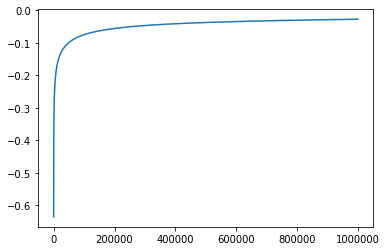

In [13]:
plt.plot(J)

### I)

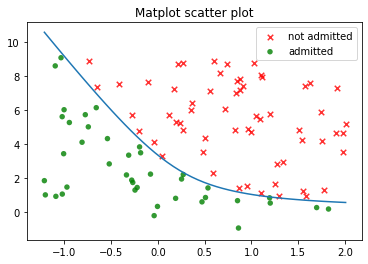

In [14]:
colors = ("red", "green")
markers = ('x', 'o')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data_train = np.c_[X_train[:, 1:3], y_train]

not_admitted = np.array([data[:2] for data in data_train if data[2] == 0.0])
admitted = np.array([data[:2] for data in data_train if data[2] == 1.0])

not_admitted_graph = ax.scatter(admitted[:, 0], admitted[:, 1], alpha=0.8, c=colors[0], marker=markers[0], edgecolors='none', s=30)
admitted_graph = ax.scatter(not_admitted[:, 0], not_admitted[:, 1], alpha=0.8, c=colors[1], marker=markers[1], edgecolors='none', s=30)

x = np.linspace(min(data_train[:,0]), max(data_train[:,0]))

c = theta[0] + theta[1]*x + theta[3]*(x**2)
b = theta[2] + theta[5] * x
a = theta[4]

y = (-b + (np.sqrt(b**2 - 4*a*c)))/(2*a)
plt.plot(x, y)

plt.title('Matplot scatter plot')
plt.legend([not_admitted_graph, admitted_graph], ["not admitted", "admitted"], loc=1)
plt.show()

Avec cette solution nous arrivons à une précision de 0.93 qui est mieux. On voit que notre solution sépare mieux les deux classes.